In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loans = pd.read_csv('./data_ml/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans['credit.policy'].unique()

array([1, 0], dtype=int64)

In [7]:
loans['purpose'].unique() # 개수 얼마 안되서 포함

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# 대출 가능여부 판단 - 모델을 생성
# 데이터 - 고객의 특성에 따라 defalut 여부가 있는 데이터
# decisiontree, randomforest를 통해서 예측모델 생성, 테스트..
# 의료데이터 금융데이터 같이 결과가 치명적인경우 테스트가 중요하다 실제로 오버피팅되는 경우가 많다

In [8]:
# 훈련데이터
y = loans['not.fully.paid']
x = loans.drop(columns='not.fully.paid')

In [17]:
# object형 -> 숫자형
x= pd.get_dummies(x)
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0,0


In [27]:
# 모든 문자열을 one hot 방식으로 바꾸면 안되는 이유

d = {'a':[1,2,3,4],'b':['봄','여름','가을','겨울'],'c':[5,6,7,8]}
temp_df = pd.DataFrame(d)

In [29]:
# one hot encoding 
# 문자열 칼럼의 데이터의 종류수 만큼 칼럼이 만들어짐
# 문자열 칼럼의 데이터 수의 종류가 너무 많으면 칼럼이 너무 많이 생긴다 => 머신러닝 학습에 방해가 된다
# 문자열 칼럼의 데이터 수가 너무 많으면 one hot 방식으로 바꾸는 것을 지양해야한다

pd.get_dummies(temp_df)

,a,c,b_가을,b_겨울,b_봄,b_여름
0,1,5,0,0,1,0
1,2,6,0,0,0,1
2,3,7,1,0,0,0
3,4,8,0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=111)  # random_state 바꿔서 점수잘나와도 의미없다

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [12]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
#예측

preds = tree.predict(x_test)

In [15]:
# 평가

from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1635
           1       0.20      0.26      0.23       281

    accuracy                           0.74      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.77      0.74      0.75      1916



# randomforest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

In [31]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
preds = rfc.predict(x_test)

In [33]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1635
           1       0.27      0.02      0.04       281

    accuracy                           0.85      1916
   macro avg       0.56      0.51      0.48      1916
weighted avg       0.77      0.85      0.79      1916



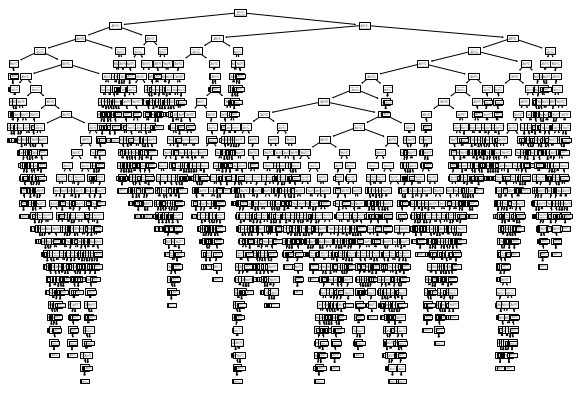

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(tree)
plt.show()

In [35]:
#gridsearch

In [38]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50,100,500], 'max_depth':[10,20,50], 'min_samples_leaf':[2,5]}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=params, refit= True, verbose= 2, cv=3)
grid.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=500; total time=   2.2s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=500; total time=   2.2s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=500; total time=   2.2s
[CV] END ..max_depth=10, min_samples_leaf=5, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=10, min_samples_leaf=5, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=10, min_samples_leaf=5, n_e

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50], 'min_samples_leaf': [2, 5],
                         'n_estimators': [50, 100, 500]},
             verbose=2)

In [40]:
grid.best_params_

{'max_depth': 50, 'min_samples_leaf': 5, 'n_estimators': 500}

In [42]:
grid.best_score_

0.8375097885669538